## Lec_6 序列模型 Sequence Model

### 6.1 自回归模型 `Autoregressive model`

- 线性神经网络
    - 向量数据 -> Model -> 向量特征 Feature Vector
- 卷积神经网络
    - 图像数据 -> Model -> 特征图 Feature Map
- 循环神经网络
    - 序列数据 -> Model -> 特征序列 Feature Seq

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
#import missingno as mano
%matplotlib inline
plt.style.use('seaborn')
import sklearn.datasets as datasets
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split  # 对数据集切分
from sklearn import metrics #import r2_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# 机器算法模型
from sklearn.neighbors import KNeighborsRegressor  # KNN，即K近邻算法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression  # 多元线性回归算法
from sklearn.linear_model import Ridge  # 线性回归算法Ridge回归，岭回归
from sklearn.linear_model import Lasso  # 线性回归算法Lasso回归，可用作特征筛选
from sklearn.tree import DecisionTreeRegressor  # 决策树，既可以做分类也可以做回归（本文主要用于分类问题）
from sklearn.svm import SVR  # 支持向量机

In [2]:
T = 1500
time =  torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01*time) + torch.normal(0, 0.2, (T, ))
train = pd.read_csv("E:/文件/深度学习12个项目实践/数据集/stock_1500.csv",header=0, index_col=0)
train_tensor=torch.tensor(train["0"].values,dtype=torch.float32)

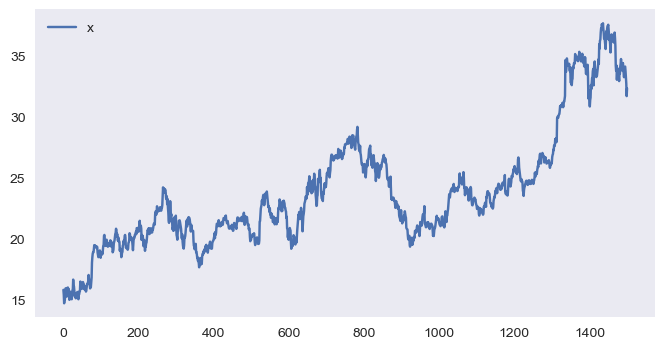

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.figure(figsize=(8, 4))
plt.grid()
plt.plot(time,train_tensor,label='x')
x=train_tensor
#plt.plot(time, x, label='x')
plt.legend()

In [4]:
# 1. 构建数据集
tau = 20
features = torch.zeros((T - tau), tau)

for i in range(tau):
    features[:, i] = x[i: T - tau + i]

labels = x[tau:].reshape((-1, 1))

print(features.shape, labels.shape)

torch.Size([1480, 20]) torch.Size([1480, 1])


In [5]:
from torch.utils.data import Dataset, DataLoader

class SeqDataset(Dataset):
    """ 模拟序列数据集 """
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx, :], self.labels[idx, :]

train_dataset = SeqDataset(features, labels)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

len(train_dataset), len(train_dataloader)

(1480, 93)

In [6]:
# 2. 构建模型
model_fc = nn.Sequential(nn.Linear(tau, 16), 
                         nn.ReLU(), 
                         nn.Linear(16, 1))
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model_fc.parameters(), lr=1e-5)

In [7]:
# 3. 训练模型 
def train_model(model, loss_func, optimizer, dataloader):
    """  """
    total_loss = 0.
    for x, y in dataloader:
        y_hat = model(x)
        loss = loss_func(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Train Loss: {total_loss/len(dataloader): .4f}")
    return total_loss/len(dataloader)

In [8]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

n_epoch = 5000
train_loss = []
for i in range(n_epoch):
    loss = train_model(model_fc, loss_func, optimizer, train_dataloader)
    train_loss.append(loss)

Train Loss:  410.6085
Train Loss:  386.6807
Train Loss:  364.9431
Train Loss:  343.4609
Train Loss:  324.1746
Train Loss:  305.9195
Train Loss:  289.8952
Train Loss:  273.6565
Train Loss:  258.0291
Train Loss:  242.7355
Train Loss:  228.1439
Train Loss:  214.2920
Train Loss:  200.5270
Train Loss:  187.2103
Train Loss:  174.5737
Train Loss:  162.4553
Train Loss:  150.7475
Train Loss:  139.3569
Train Loss:  128.7191
Train Loss:  118.9769
Train Loss:  108.8980
Train Loss:  99.9613
Train Loss:  91.1432
Train Loss:  83.0178
Train Loss:  75.1830
Train Loss:  67.9051
Train Loss:  61.1602
Train Loss:  54.9278
Train Loss:  49.1083
Train Loss:  43.6422
Train Loss:  38.6835
Train Loss:  34.0561
Train Loss:  29.8773
Train Loss:  26.1314
Train Loss:  22.6820
Train Loss:  19.6129
Train Loss:  16.8047
Train Loss:  14.3521
Train Loss:  12.1857
Train Loss:  10.3042
Train Loss:  8.6855
Train Loss:  7.2522
Train Loss:  6.0606
Train Loss:  5.0094
Train Loss:  4.1600
Train Loss:  3.4417
Train Loss:  2.8681

Train Loss:  0.5243
Train Loss:  0.5236
Train Loss:  0.5214
Train Loss:  0.5225
Train Loss:  0.5242
Train Loss:  0.5210
Train Loss:  0.5207
Train Loss:  0.5218
Train Loss:  0.5187
Train Loss:  0.5162
Train Loss:  0.5227
Train Loss:  0.5204
Train Loss:  0.5190
Train Loss:  0.5154
Train Loss:  0.5133
Train Loss:  0.5139
Train Loss:  0.5137
Train Loss:  0.5131
Train Loss:  0.5114
Train Loss:  0.5112
Train Loss:  0.5115
Train Loss:  0.5113
Train Loss:  0.5102
Train Loss:  0.5101
Train Loss:  0.5089
Train Loss:  0.5095
Train Loss:  0.5099
Train Loss:  0.5056
Train Loss:  0.5065
Train Loss:  0.5077
Train Loss:  0.5035
Train Loss:  0.5062
Train Loss:  0.5029
Train Loss:  0.5074
Train Loss:  0.5019
Train Loss:  0.5027
Train Loss:  0.5014
Train Loss:  0.5005
Train Loss:  0.4996
Train Loss:  0.5004
Train Loss:  0.4979
Train Loss:  0.4966
Train Loss:  0.4964
Train Loss:  0.4973
Train Loss:  0.4955
Train Loss:  0.4989
Train Loss:  0.4977
Train Loss:  0.4983
Train Loss:  0.4955
Train Loss:  0.4941


Train Loss:  0.3494
Train Loss:  0.3516
Train Loss:  0.3483
Train Loss:  0.3491
Train Loss:  0.3482
Train Loss:  0.3476
Train Loss:  0.3482
Train Loss:  0.3470
Train Loss:  0.3473
Train Loss:  0.3468
Train Loss:  0.3478
Train Loss:  0.3463
Train Loss:  0.3464
Train Loss:  0.3457
Train Loss:  0.3457
Train Loss:  0.3479
Train Loss:  0.3460
Train Loss:  0.3468
Train Loss:  0.3449
Train Loss:  0.3448
Train Loss:  0.3443
Train Loss:  0.3437
Train Loss:  0.3456
Train Loss:  0.3457
Train Loss:  0.3431
Train Loss:  0.3436
Train Loss:  0.3456
Train Loss:  0.3434
Train Loss:  0.3445
Train Loss:  0.3428
Train Loss:  0.3414
Train Loss:  0.3420
Train Loss:  0.3429
Train Loss:  0.3410
Train Loss:  0.3418
Train Loss:  0.3428
Train Loss:  0.3406
Train Loss:  0.3412
Train Loss:  0.3432
Train Loss:  0.3404
Train Loss:  0.3392
Train Loss:  0.3399
Train Loss:  0.3388
Train Loss:  0.3407
Train Loss:  0.3399
Train Loss:  0.3394
Train Loss:  0.3417
Train Loss:  0.3388
Train Loss:  0.3382
Train Loss:  0.3401


Train Loss:  0.2848
Train Loss:  0.2843
Train Loss:  0.2845
Train Loss:  0.2839
Train Loss:  0.2851
Train Loss:  0.2836
Train Loss:  0.2835
Train Loss:  0.2833
Train Loss:  0.2866
Train Loss:  0.2842
Train Loss:  0.2847
Train Loss:  0.2835
Train Loss:  0.2828
Train Loss:  0.2834
Train Loss:  0.2845
Train Loss:  0.2831
Train Loss:  0.2831
Train Loss:  0.2847
Train Loss:  0.2826
Train Loss:  0.2833
Train Loss:  0.2834
Train Loss:  0.2817
Train Loss:  0.2819
Train Loss:  0.2817
Train Loss:  0.2819
Train Loss:  0.2824
Train Loss:  0.2813
Train Loss:  0.2816
Train Loss:  0.2814
Train Loss:  0.2816
Train Loss:  0.2804
Train Loss:  0.2817
Train Loss:  0.2810
Train Loss:  0.2794
Train Loss:  0.2820
Train Loss:  0.2809
Train Loss:  0.2808
Train Loss:  0.2823
Train Loss:  0.2813
Train Loss:  0.2800
Train Loss:  0.2815
Train Loss:  0.2791
Train Loss:  0.2823
Train Loss:  0.2796
Train Loss:  0.2822
Train Loss:  0.2798
Train Loss:  0.2819
Train Loss:  0.2802
Train Loss:  0.2803
Train Loss:  0.2786


Train Loss:  0.2503
Train Loss:  0.2504
Train Loss:  0.2507
Train Loss:  0.2511
Train Loss:  0.2506
Train Loss:  0.2505
Train Loss:  0.2512
Train Loss:  0.2501
Train Loss:  0.2516
Train Loss:  0.2523
Train Loss:  0.2513
Train Loss:  0.2503
Train Loss:  0.2494
Train Loss:  0.2501
Train Loss:  0.2498
Train Loss:  0.2503
Train Loss:  0.2495
Train Loss:  0.2504
Train Loss:  0.2488
Train Loss:  0.2507
Train Loss:  0.2512
Train Loss:  0.2497
Train Loss:  0.2503
Train Loss:  0.2484
Train Loss:  0.2493
Train Loss:  0.2487
Train Loss:  0.2492
Train Loss:  0.2490
Train Loss:  0.2492
Train Loss:  0.2497
Train Loss:  0.2485
Train Loss:  0.2483
Train Loss:  0.2493
Train Loss:  0.2507
Train Loss:  0.2486
Train Loss:  0.2474
Train Loss:  0.2490
Train Loss:  0.2478
Train Loss:  0.2481
Train Loss:  0.2481
Train Loss:  0.2485
Train Loss:  0.2474
Train Loss:  0.2479
Train Loss:  0.2512
Train Loss:  0.2479
Train Loss:  0.2484
Train Loss:  0.2482
Train Loss:  0.2476
Train Loss:  0.2473
Train Loss:  0.2490


Train Loss:  0.2278
Train Loss:  0.2272
Train Loss:  0.2298
Train Loss:  0.2280
Train Loss:  0.2287
Train Loss:  0.2276
Train Loss:  0.2278
Train Loss:  0.2273
Train Loss:  0.2276
Train Loss:  0.2271
Train Loss:  0.2268
Train Loss:  0.2280
Train Loss:  0.2287
Train Loss:  0.2278
Train Loss:  0.2273
Train Loss:  0.2276
Train Loss:  0.2263
Train Loss:  0.2278
Train Loss:  0.2278
Train Loss:  0.2272
Train Loss:  0.2269
Train Loss:  0.2263
Train Loss:  0.2272
Train Loss:  0.2273
Train Loss:  0.2269
Train Loss:  0.2269
Train Loss:  0.2274
Train Loss:  0.2263
Train Loss:  0.2262
Train Loss:  0.2277
Train Loss:  0.2260
Train Loss:  0.2269
Train Loss:  0.2272
Train Loss:  0.2285
Train Loss:  0.2269
Train Loss:  0.2263
Train Loss:  0.2266
Train Loss:  0.2267
Train Loss:  0.2264
Train Loss:  0.2266
Train Loss:  0.2263
Train Loss:  0.2270
Train Loss:  0.2262
Train Loss:  0.2256
Train Loss:  0.2271
Train Loss:  0.2259
Train Loss:  0.2249
Train Loss:  0.2256
Train Loss:  0.2256
Train Loss:  0.2254


Train Loss:  0.2150
Train Loss:  0.2149
Train Loss:  0.2112
Train Loss:  0.2118
Train Loss:  0.2142
Train Loss:  0.2116
Train Loss:  0.2108
Train Loss:  0.2125
Train Loss:  0.2134
Train Loss:  0.2111
Train Loss:  0.2123
Train Loss:  0.2104
Train Loss:  0.2110
Train Loss:  0.2113
Train Loss:  0.2106
Train Loss:  0.2105
Train Loss:  0.2117
Train Loss:  0.2119
Train Loss:  0.2111
Train Loss:  0.2115
Train Loss:  0.2105
Train Loss:  0.2104
Train Loss:  0.2113
Train Loss:  0.2108
Train Loss:  0.2108
Train Loss:  0.2108
Train Loss:  0.2117
Train Loss:  0.2108
Train Loss:  0.2113
Train Loss:  0.2113
Train Loss:  0.2109
Train Loss:  0.2110
Train Loss:  0.2102
Train Loss:  0.2099
Train Loss:  0.2132
Train Loss:  0.2103
Train Loss:  0.2106
Train Loss:  0.2102
Train Loss:  0.2100
Train Loss:  0.2109
Train Loss:  0.2103
Train Loss:  0.2115
Train Loss:  0.2102
Train Loss:  0.2097
Train Loss:  0.2111
Train Loss:  0.2103
Train Loss:  0.2102
Train Loss:  0.2098
Train Loss:  0.2103
Train Loss:  0.2101


Train Loss:  0.1985
Train Loss:  0.1999
Train Loss:  0.1994
Train Loss:  0.1988
Train Loss:  0.1996
Train Loss:  0.1997
Train Loss:  0.1994
Train Loss:  0.2002
Train Loss:  0.1988
Train Loss:  0.1994
Train Loss:  0.1989
Train Loss:  0.1996
Train Loss:  0.2006
Train Loss:  0.1985
Train Loss:  0.1987
Train Loss:  0.1980
Train Loss:  0.1994
Train Loss:  0.1978
Train Loss:  0.1995
Train Loss:  0.1984
Train Loss:  0.1986
Train Loss:  0.1985
Train Loss:  0.1993
Train Loss:  0.1984
Train Loss:  0.1981
Train Loss:  0.1989
Train Loss:  0.1984
Train Loss:  0.1997
Train Loss:  0.1983
Train Loss:  0.1991
Train Loss:  0.1991
Train Loss:  0.1983
Train Loss:  0.1997
Train Loss:  0.1980
Train Loss:  0.1985
Train Loss:  0.2008
Train Loss:  0.1979
Train Loss:  0.1992
Train Loss:  0.1989
Train Loss:  0.1991
Train Loss:  0.1984
Train Loss:  0.1989
Train Loss:  0.1989
Train Loss:  0.1971
Train Loss:  0.1984
Train Loss:  0.1978
Train Loss:  0.1979
Train Loss:  0.1980
Train Loss:  0.1977
Train Loss:  0.1981


Train Loss:  0.1884
Train Loss:  0.1911
Train Loss:  0.1892
Train Loss:  0.1889
Train Loss:  0.1909
Train Loss:  0.1896
Train Loss:  0.1892
Train Loss:  0.1888
Train Loss:  0.1894
Train Loss:  0.1905
Train Loss:  0.1902
Train Loss:  0.1903
Train Loss:  0.1890
Train Loss:  0.1898
Train Loss:  0.1893
Train Loss:  0.1888
Train Loss:  0.1896
Train Loss:  0.1913
Train Loss:  0.1888
Train Loss:  0.1892
Train Loss:  0.1890
Train Loss:  0.1887
Train Loss:  0.1885
Train Loss:  0.1898
Train Loss:  0.1897
Train Loss:  0.1888
Train Loss:  0.1880
Train Loss:  0.1888
Train Loss:  0.1893
Train Loss:  0.1879
Train Loss:  0.1895
Train Loss:  0.1897
Train Loss:  0.1888
Train Loss:  0.1900
Train Loss:  0.1880
Train Loss:  0.1890
Train Loss:  0.1891
Train Loss:  0.1884
Train Loss:  0.1883
Train Loss:  0.1881
Train Loss:  0.1894
Train Loss:  0.1889
Train Loss:  0.1881
Train Loss:  0.1875
Train Loss:  0.1887
Train Loss:  0.1926
Train Loss:  0.1879
Train Loss:  0.1880
Train Loss:  0.1884
Train Loss:  0.1887


Train Loss:  0.1815
Train Loss:  0.1816
Train Loss:  0.1810
Train Loss:  0.1820
Train Loss:  0.1814
Train Loss:  0.1818
Train Loss:  0.1822
Train Loss:  0.1841
Train Loss:  0.1827
Train Loss:  0.1815
Train Loss:  0.1810
Train Loss:  0.1813
Train Loss:  0.1814
Train Loss:  0.1816
Train Loss:  0.1811
Train Loss:  0.1811
Train Loss:  0.1820
Train Loss:  0.1812
Train Loss:  0.1813
Train Loss:  0.1811
Train Loss:  0.1821
Train Loss:  0.1813
Train Loss:  0.1806
Train Loss:  0.1808
Train Loss:  0.1804
Train Loss:  0.1824
Train Loss:  0.1811
Train Loss:  0.1822
Train Loss:  0.1825
Train Loss:  0.1805
Train Loss:  0.1814
Train Loss:  0.1803
Train Loss:  0.1802
Train Loss:  0.1805
Train Loss:  0.1815
Train Loss:  0.1809
Train Loss:  0.1803
Train Loss:  0.1804
Train Loss:  0.1807
Train Loss:  0.1810
Train Loss:  0.1810
Train Loss:  0.1852
Train Loss:  0.1808
Train Loss:  0.1808
Train Loss:  0.1806
Train Loss:  0.1832
Train Loss:  0.1825
Train Loss:  0.1801
Train Loss:  0.1811
Train Loss:  0.1796


Train Loss:  0.1757
Train Loss:  0.1753
Train Loss:  0.1761
Train Loss:  0.1748
Train Loss:  0.1741
Train Loss:  0.1746
Train Loss:  0.1748
Train Loss:  0.1757
Train Loss:  0.1757
Train Loss:  0.1748
Train Loss:  0.1748
Train Loss:  0.1748
Train Loss:  0.1750
Train Loss:  0.1746
Train Loss:  0.1753
Train Loss:  0.1751
Train Loss:  0.1750
Train Loss:  0.1748
Train Loss:  0.1747
Train Loss:  0.1746
Train Loss:  0.1742
Train Loss:  0.1737
Train Loss:  0.1735
Train Loss:  0.1764
Train Loss:  0.1739
Train Loss:  0.1754
Train Loss:  0.1745
Train Loss:  0.1747
Train Loss:  0.1742
Train Loss:  0.1746
Train Loss:  0.1737
Train Loss:  0.1747
Train Loss:  0.1749
Train Loss:  0.1741
Train Loss:  0.1758
Train Loss:  0.1742
Train Loss:  0.1738
Train Loss:  0.1730
Train Loss:  0.1744
Train Loss:  0.1746
Train Loss:  0.1746
Train Loss:  0.1744
Train Loss:  0.1741
Train Loss:  0.1739
Train Loss:  0.1745
Train Loss:  0.1751
Train Loss:  0.1741
Train Loss:  0.1741
Train Loss:  0.1744
Train Loss:  0.1748


Train Loss:  0.1691
Train Loss:  0.1707
Train Loss:  0.1694
Train Loss:  0.1696
Train Loss:  0.1690
Train Loss:  0.1694
Train Loss:  0.1695
Train Loss:  0.1691
Train Loss:  0.1692
Train Loss:  0.1688
Train Loss:  0.1719
Train Loss:  0.1693
Train Loss:  0.1690
Train Loss:  0.1688
Train Loss:  0.1701
Train Loss:  0.1695
Train Loss:  0.1693
Train Loss:  0.1684
Train Loss:  0.1688
Train Loss:  0.1694
Train Loss:  0.1702
Train Loss:  0.1687
Train Loss:  0.1690
Train Loss:  0.1708
Train Loss:  0.1688
Train Loss:  0.1689
Train Loss:  0.1709
Train Loss:  0.1686
Train Loss:  0.1685
Train Loss:  0.1690
Train Loss:  0.1690
Train Loss:  0.1698
Train Loss:  0.1693
Train Loss:  0.1686
Train Loss:  0.1693
Train Loss:  0.1684
Train Loss:  0.1678
Train Loss:  0.1688
Train Loss:  0.1686
Train Loss:  0.1703
Train Loss:  0.1689
Train Loss:  0.1689
Train Loss:  0.1694
Train Loss:  0.1684
Train Loss:  0.1690
Train Loss:  0.1688
Train Loss:  0.1695
Train Loss:  0.1713
Train Loss:  0.1701
Train Loss:  0.1692


Train Loss:  0.1655
Train Loss:  0.1639
Train Loss:  0.1643
Train Loss:  0.1711
Train Loss:  0.1649
Train Loss:  0.1647
Train Loss:  0.1640
Train Loss:  0.1641
Train Loss:  0.1640
Train Loss:  0.1645
Train Loss:  0.1654
Train Loss:  0.1651
Train Loss:  0.1647
Train Loss:  0.1643
Train Loss:  0.1643
Train Loss:  0.1649
Train Loss:  0.1652
Train Loss:  0.1638
Train Loss:  0.1640
Train Loss:  0.1643
Train Loss:  0.1649
Train Loss:  0.1644
Train Loss:  0.1644
Train Loss:  0.1644
Train Loss:  0.1637
Train Loss:  0.1645
Train Loss:  0.1645
Train Loss:  0.1647
Train Loss:  0.1643
Train Loss:  0.1653
Train Loss:  0.1645
Train Loss:  0.1646
Train Loss:  0.1639
Train Loss:  0.1636
Train Loss:  0.1645
Train Loss:  0.1642
Train Loss:  0.1635
Train Loss:  0.1712
Train Loss:  0.1648
Train Loss:  0.1644
Train Loss:  0.1639
Train Loss:  0.1645
Train Loss:  0.1643
Train Loss:  0.1667
Train Loss:  0.1647
Train Loss:  0.1638
Train Loss:  0.1651
Train Loss:  0.1643
Train Loss:  0.1643
Train Loss:  0.1643


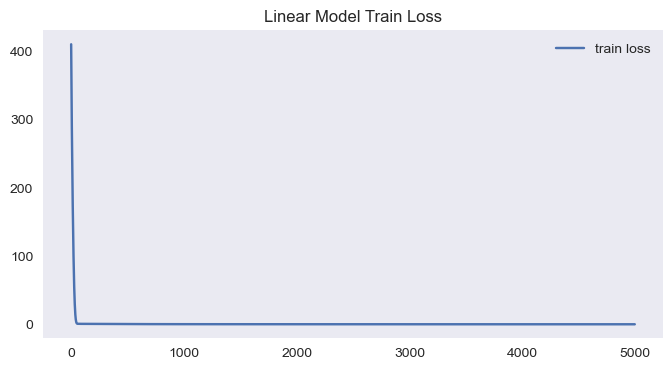

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(train_loss, label="train loss")
plt.title("Linear Model Train Loss")
plt.legend()

plt.grid()
plt.show()

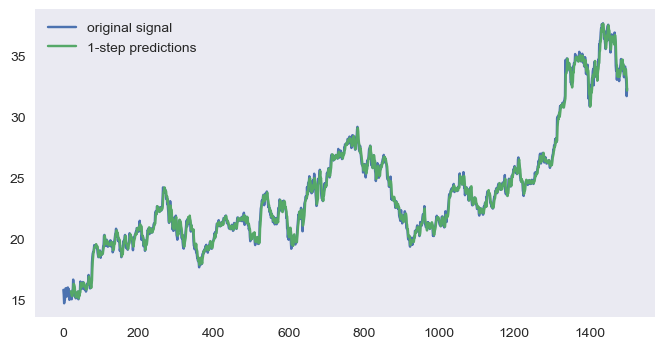

In [10]:
plt.figure(figsize=(8, 4))
plt.grid()

onestep_preds = model_fc(features).detach().numpy()

plt.plot(time, x, label='original signal')
plt.plot(time[tau: ], onestep_preds, label="1-step predictions")

plt.legend()

In [11]:
n_train = 400

multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]

for i in range(n_train+tau, T): # [604, 1000]
    multistep_preds[i] = model_fc(multistep_preds[i-tau: i].reshape((1, -1)))

multistep_preds = multistep_preds.detach().numpy()
multistep_preds.shape

(1500,)

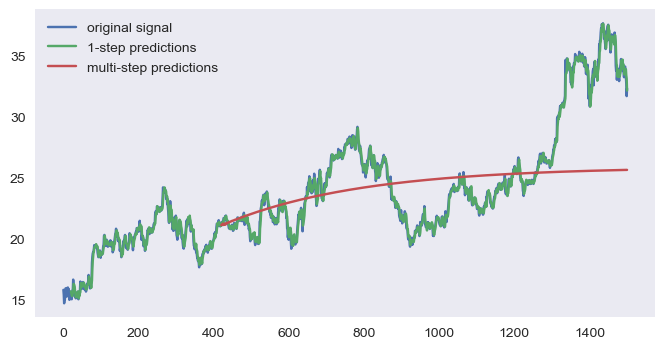

In [12]:
plt.figure(figsize=(8, 4))
plt.grid()

onestep_preds = model_fc(features).detach().numpy()

plt.plot(time, x, label='original signal')
plt.plot(time[tau: ], onestep_preds, label="1-step predictions")
plt.plot(time[n_train+tau: ], multistep_preds[n_train+tau: ], label="multi-step predictions")

plt.legend()

### 6.2 循环神经网络
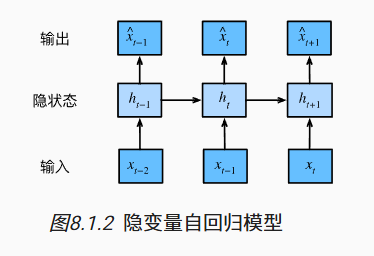

- 隐变量自回归 `Autoregressive model`
    - 循环神经网络 RNN (Recurrent Neural Network)
        - RNN
        - LSTM
        - GRU
        - BiLSTM 双向长短期记忆网络
        - ......
     - Transformers

In [13]:
x = torch.randn(4, 1)  # [batch_size, input_size]

hidden_state = torch.randn(4, 8)  # [batch_size, hidden_size]
print(f"Last Hidden State:\n {hidden_state}")

weight_xh = torch.randn(1, 8)  # [input_size, hidden_size]
weight_hh = torch.randn(8, 8)  # [hidden_size, hidden_size]

hidden_state = torch.cat((x, hidden_state), dim=1) @ torch.cat((weight_xh, weight_hh), dim=0)
print(f"Current Hidden State:\n {hidden_state}")

Last Hidden State:
 tensor([[ 0.5505,  2.7773, -1.0661, -2.4991,  1.6799,  1.2007,  3.2840,  0.1805],
        [-1.4597,  0.4545,  0.1872, -0.8125,  0.8190, -0.5235,  0.9885,  1.2692],
        [-1.5253,  0.2268, -0.3344, -0.7383, -0.6983, -0.7667, -0.7944, -0.1064],
        [-0.7496,  0.1301, -1.9706,  0.6939,  0.9686, -0.2331, -0.2209, -0.5005]])
Current Hidden State:
 tensor([[-1.4224,  1.5679,  8.2177,  2.9428,  0.7408, -3.4411, 10.6087,  4.4873],
        [-1.9899, -0.8653,  3.0841,  0.7430,  3.8958,  2.3127,  1.6068, -2.2542],
        [ 3.6911, -7.4914, -0.7908,  8.2078,  0.5257,  2.3611,  4.4116,  0.4617],
        [ 0.0825, -0.6590,  2.7234, -0.1572,  2.3894,  0.5983, -1.5108,  2.1854]])


In [14]:
class RNNCell(nn.Module):
    """ 循环神经网络单元 """
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.weight_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.weight_output = nn.Linear(hidden_size, hidden_size)

        self.bias_hidden = nn.Parameter(torch.randn(hidden_size))
        self.bias_output = nn.Parameter(torch.randn(hidden_size))

    def forward(self, x, hidden, batch_first=True):
        """ 前向传播方法 """
        # x: [batch_size, seq_len, input_size]
        # hiiden: [batch_size, hidden_size]
        if batch_first:
            x = x.transpose(0, 1) # 维度交换 -> [seq_len, batch_size, input_size]

        hiddens = []
        outputs = []
        for i in range(x.shape[0]):
            combined = torch.cat((x[i], hidden), dim=1)   # [batch_size, input_size], [batch_size, hidden_size] -> [batch_size, (input_size + hidden_size)]
            hidden = self.weight_hidden(combined) + self.bias_hidden  # [batch_size, hidden_size]
            output = self.weight_output(hidden) + self.bias_output # [batch_size, hidden_size]

            hiddens.append(hidden)
            outputs.append(output)
        return torch.stack(hiddens).transpose(0, 1), torch.stack(outputs).transpose(0, 1)

In [15]:
torch.stack([torch.randn(3, 3), torch.randn(3, 3)]).shape

torch.Size([2, 3, 3])

In [16]:
batch_size = 4
seq_len = 10
input_size = 16
hidden_size =32

In [17]:
x = torch.randn(batch_size, seq_len, input_size)
h0 = torch.randn(batch_size, hidden_size)

x.shape, h0.shape

(torch.Size([4, 10, 16]), torch.Size([4, 32]))

In [18]:
model = RNNCell(input_size=input_size, hidden_size=hidden_size)
model

RNNCell(
  (weight_hidden): Linear(in_features=48, out_features=32, bias=True)
  (weight_output): Linear(in_features=32, out_features=32, bias=True)
)

In [19]:
hiddens, outputs = model(x, h0)
hiddens.shape, outputs.shape

(torch.Size([4, 10, 32]), torch.Size([4, 10, 32]))

In [20]:
class RNNBasedRegression(nn.Module):
    """ 基于循环神经网络结构的回归模型 """
    def __init__(self, input_size, hidden_size, seq_len):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = RNNCell(input_size, hidden_size)
        self.classifier = nn.Sequential(nn.Flatten(), 
                                        nn.ReLU(), 
                                        nn.Linear(seq_len*hidden_size, 1))

    def forward(self, x):
        """ 前向传播方法 """
        h0 = torch.randn(x.shape[0], self.hidden_size)
        _, outputs = self.rnn(x, h0)
        return self.classifier(outputs)